In [ ]:
#!pip install nltk 
#!pip install pyldavis 
#!pip install stanza
#!pip install wordcloud 
#!pip install openturns
!pip install -U setuptools
!pip install reliability
#!apt update && apt install -y libsm6 libxext6

In [ ]:
#https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [56]:
DATA_PATH = '../../data/agent-benchmark'
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [57]:
def read_data(filename):
    data = pd.read_csv(filename, sep=";", names =['utterance','label'], header=None, dtype={'utterance':str, 'label': str} )
    return data

In [58]:
train_data = read_data(TRAIN_DATASET)
val_data = read_data(VAL_DATASET)
test_data = read_data(TEST_DATASET)
full_dataset = pd.concat([train_data, val_data, test_data], ignore_index=True)
full_dataset.head()

,utterance,label
0,where is my meeting today located,calendar_notification
1,please purchase me a train ticket to atlanta,transport_directions
2,i want a recipe for a burrito,cooking_recipe
3,play some radio,radio_play
4,i don't want eggs,lists_remove


In [59]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

18415
2047
5116


In [60]:
len(full_dataset)

25578

In [96]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
print(full_dataset.head(1000))

                                        utterance                  label
0               where is my meeting today located  calendar_notification
1    please purchase me a train ticket to atlanta   transport_directions
2                   i want a recipe for a burrito         cooking_recipe
3                                 play some radio             radio_play
4                               i don't want eggs           lists_remove
..                                            ...                    ...
995     send wedding invites to all wedding party        weather_request
996             tell me the music that is playing         music_question
997                   what is on my shopping list            lists_query
998                           who is singing this         music_question
999                               next one please          podcasts_play

[1000 rows x 2 columns]


### Remove data from labels containing less then 10 examples:

In [61]:
bytag = full_dataset.groupby('label').aggregate(np.count_nonzero)
print(bytag.sort_values(by='utterance', ascending=False))

                           utterance
label                               
music_play                      1218
IOT_hue                         1068
QA_factoid                       973
calendar_set_event               959
email_query                      887
weather_request                  839
general_conversation             824
calendar_delete_event            729
news_query                       729
radio_play                       697
general_feedback                 696
datetime_query                   674
QA_definition                    618
calendar_query_event             610
QA_open_query                    599
email_send_email                 582
social_post                      581
QA_celebrity                     539
podcasts_play                    480
lists_query                      477
transport_train                  477
weather_question                 439
music_preferences                416
lists_remove                     403
reminder_set                     372
g

In [62]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
#dd = full_dataset[full_dataset['label'].isin(['Sintomas.Qualificado.Equipamento liga e desliga sozinho'])]
full_dataset.head(100)

,utterance,label
0,where is my meeting today located,calendar_notification
1,please purchase me a train ticket to atlanta,transport_directions
2,i want a recipe for a burrito,cooking_recipe
3,play some radio,radio_play
4,i don't want eggs,lists_remove
5,please ute me on any news that has to do with the blizzard,news_query
6,how do i cook butter chicken,cooking_question
7,remind me an email to my sister,contacts_query
8,find me a joke related to baseball,general_joke
9,enter silence mode,audio_mute


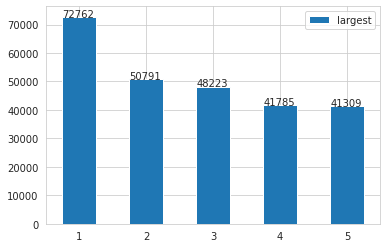

In [63]:
largest_qtys = [72762,50791,48223,41785,41309] 
smallest_qtys = [33,32,20,14,11]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys}, index = index)
ax = df2.plot.bar(figsize=(6,4),rot=0)
x_offset = -0.2
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, (b.x0, b.y1 + y_offset))

In [ ]:
largest_qtys = [72762,50791,48223,41785,41309] 
smallest_qtys = [33,32,20,14,11]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys, 'smallest': smallest_qtys}, index = index)
ax = df2.plot.bar(figsize=(8,4),rot=0)
x_offset = 0
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

<AxesSubplot:>

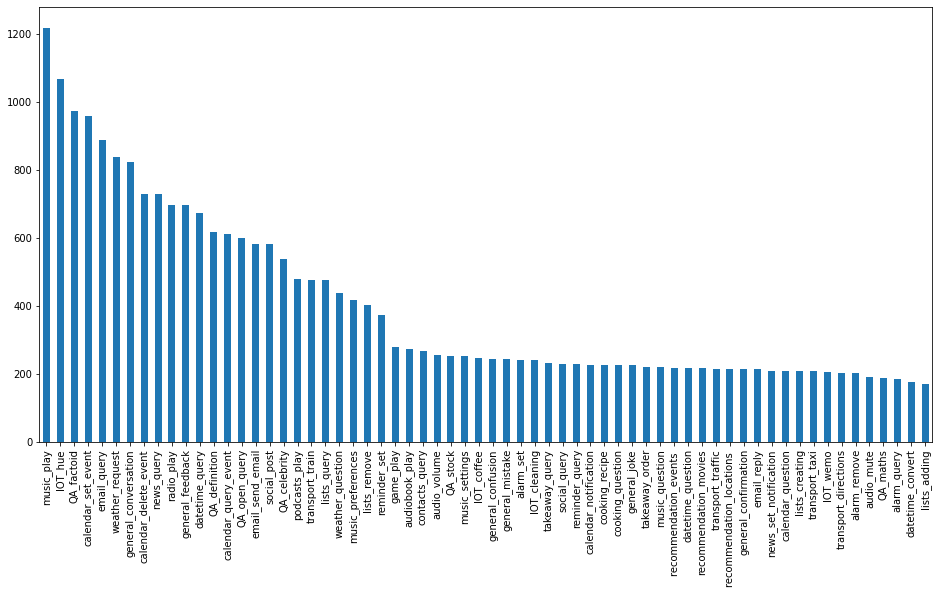

In [14]:
full_dataset.label.value_counts().plot.bar(figsize=(16,8))

###  Sentence size (token number) distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


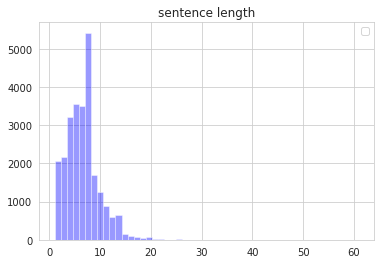

In [64]:
def getSentenceLen(str):
    import re
    try:
        return len(re.findall(r'\w+', str))
    except:
        return 0

sns.set_style("whitegrid")
length_checker = np.vectorize(getSentenceLen) 
sentence_len = length_checker(full_dataset['utterance']) 

sns.distplot(sentence_len,bins= 50, hist=True, kde=False, color='b')
plt.title('sentence length'); plt.legend()
plt.show()


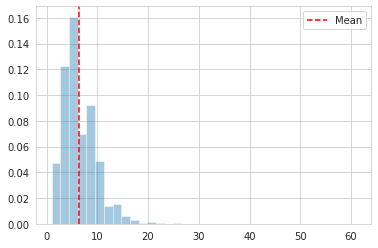

In [65]:
ax_hist = plt.subplot()
mean = sentence_len.mean()
#sentence_len.median()
#sentence_len.mode().get_values()[0]

sns.distplot(sentence_len, ax=ax_hist,bins= 35,kde=False,norm_hist=True)
ax_hist.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

#plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.legend({'Mean':mean})
plt.show()

In [66]:
sentence_len.mean()

6.469778716084135

In [67]:
print('min seq len ', sentence_len.min())
print('max seq len ', sentence_len.max())
print('mean ', sentence_len.mean())
print('std dev ', sentence_len.std())

min seq len  1
max seq len  61
mean  6.469778716084135
std dev  3.3498718203918605


<AxesSubplot:>

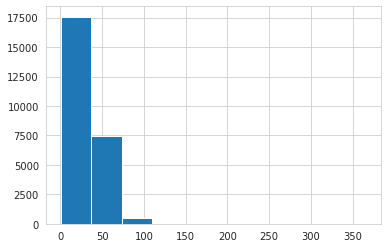

In [68]:
full_dataset['utterance'].str.len().hist()

<AxesSubplot:>

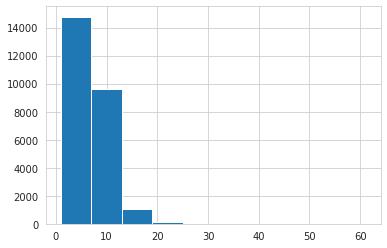

In [69]:
full_dataset['utterance'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

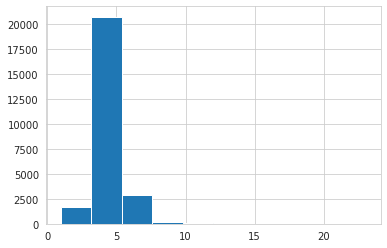

In [70]:
full_dataset['utterance'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [79]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
corpus=[]
new= full_dataset['utterance'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word not in stop_words:
        dic[word]+=1

<BarContainer object of 10 artists>

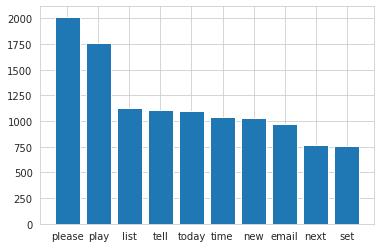

In [81]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

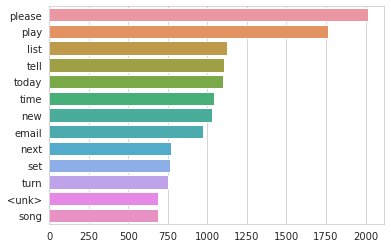

In [84]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

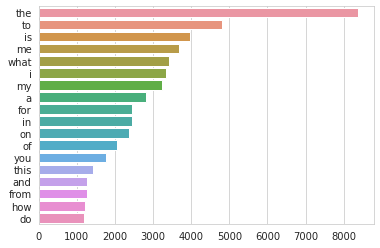

In [87]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:20]:
    if (word in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [88]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('portuguese'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

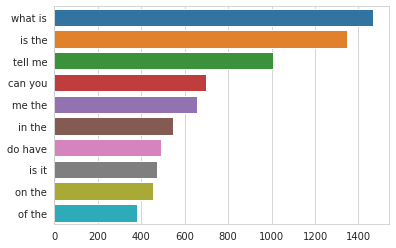

In [89]:
plot_top_ngrams_barchart(full_dataset['utterance'],2)

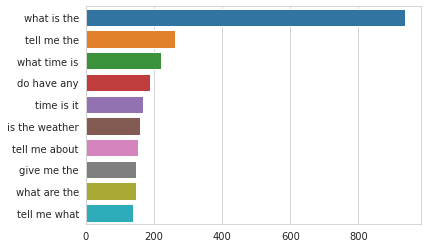

In [90]:
plot_top_ngrams_barchart(full_dataset['utterance'],3)

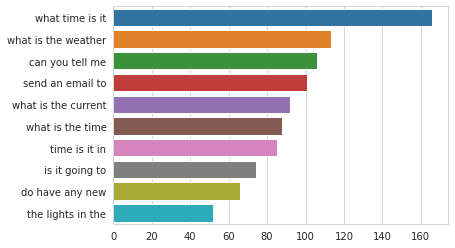

In [91]:
plot_top_ngrams_barchart(full_dataset['utterance'],4)